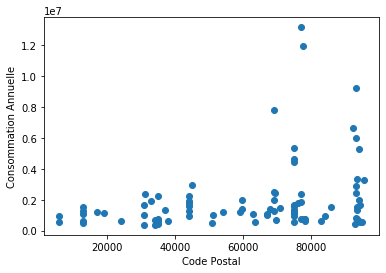

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

inventaire_immobilier = pd.read_csv('../datasets/inv-imm-20181231.csv', sep=";", encoding = 'unicode_escape')[['Code Chorus', 'ID', 'Fonction', 'Code Postal', 'Ministère']]

xls1 = pd.ExcelFile("../datasets/Vague1_Lot1.xls")
conso_annuelle_lot1 = xls1.parse('Sites', skiprows=5, na_values=['NA'])[['CODE POSTAL', 'TOTAL ']]
conso_annuelle_lot1.drop(0, inplace=True)

X = conso_annuelle_lot1["CODE POSTAL"]
Y = conso_annuelle_lot1["TOTAL "]

plt.xlabel('Code Postal')
plt.ylabel('Consommation Annuelle')
plt.scatter(X, Y)
plt.show()

#conso_annuelle_total = pd.concat([conso_annuelle_lot1, conso_annuelle_lot3, conso_annuelle_lot2_1, conso_annuelle_lot2_2])
conso_annuelle_lot1.to_csv("../datasets/vague1.csv")

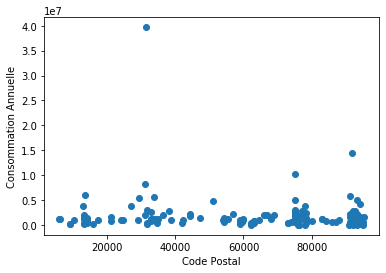

In [5]:
xls2 = pd.ExcelFile("../datasets/Vague2_Lot1.xls")
conso_annuelle_lot2_1 = xls2.parse('Sites LOT 1', skiprows=4, na_values=['NA'])[['CODE POSTAL', 'TOTAL ']]
conso_annuelle_lot2_1.drop(0, inplace=True)
conso_annuelle_lot2_2 = xls2.parse('LOT 1 Détail conso 8 postes', skiprows=3, na_values=['NA'])[['CODE POSTAL', 'TOTAL']]
conso_annuelle_lot2_2.drop(0, inplace=True)
conso_annuelle_lot2_2["TOTAL "] = conso_annuelle_lot2_2["TOTAL"]
conso_annuelle_lot2_2.drop(columns='TOTAL', inplace=True)


X = conso_annuelle_lot2_1["CODE POSTAL"]
X = X.append(conso_annuelle_lot2_2["CODE POSTAL"])

Y = conso_annuelle_lot2_1["TOTAL "]
Y = Y.append(conso_annuelle_lot2_2["TOTAL "])

plt.xlabel('Code Postal')
plt.ylabel('Consommation Annuelle')
plt.scatter(X, Y)
plt.show()

conso_annuelle_lot2 = pd.concat([conso_annuelle_lot2_1, conso_annuelle_lot2_2])

conso_annuelle_lot2.to_csv("../datasets/vague2.csv")

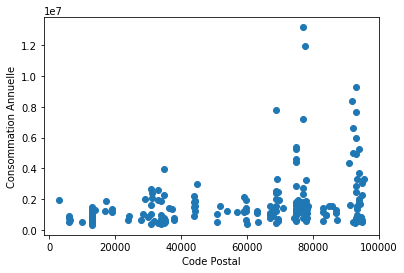

In [3]:
xls3 = pd.ExcelFile("../datasets/Vague3_Lot1.xls")
conso_annuelle_lot3 = xls3.parse('Sites', skiprows=4, na_values=['NA'])[['CODE POSTAL', 'TOTAL ']]
conso_annuelle_lot3.drop(0, inplace=True)
conso_annuelle_lot3['CODE POSTAL'] = pd.to_numeric(conso_annuelle_lot3['CODE POSTAL'], errors='coerce')

X = X.append(conso_annuelle_lot3["CODE POSTAL"])

Y = Y.append(conso_annuelle_lot3["TOTAL "])

plt.xlabel('Code Postal')
plt.ylabel('Consommation Annuelle')
plt.scatter(X, Y)
plt.show()

conso_annuelle_lot3.to_csv("../datasets/vague3.csv")